In [71]:
from SimPEG import Mesh, Survey
import SimPEG.EM.Static.DC as DC
%pylab inline
import matplotlib
matplotlib.rcParams['font.size'] = 16


Populating the interactive namespace from numpy and matplotlib


In [84]:
import pickle
fname = open("./PF/Magresults", "rb")
mag_results = pickle.load(fname)
fname.close()
fname = open("./PF/Gravresults", "rb")
grav_results = pickle.load(fname)
fname.close()
fname = open("./DC/DCresults", "rb")
DC_results = pickle.load(fname)
fname.close()

In [85]:
mesh = DC_results["mesh"]
x = mesh.vectorCCx[np.logical_and(mesh.vectorCCx>-300., mesh.vectorCCx<300.)]
y = mesh.vectorCCy[np.logical_and(mesh.vectorCCy>-300., mesh.vectorCCy<300.)]
Mx = Utils.ndgrid(x[:-1], y, np.r_[-12.5/2.])
Nx = Utils.ndgrid(x[1:], y, np.r_[-12.5/2.])
My = Utils.ndgrid(x, y[:-1], np.r_[-12.5/2.])
Ny = Utils.ndgrid(x, y[1:], np.r_[-12.5/2.])
Xx = 0.5*(Mx[:,0]+Nx[:,0]).reshape((23, 24), order="F")
Yx = Mx[:,1].reshape((23, 24), order="F")
Xy = My[:,0].reshape((24, 23), order="F")
Yy = 0.5*(My[:,1]+Ny[:,1]).reshape((24, 23), order="F")
rx_x = DC.Rx.Dipole(Mx, Nx)
rx_y = DC.Rx.Dipole(My, Ny)
Aloc1_x = np.r_[-600., 0, 0.]
Bloc1_x = np.r_[600., 0, 0.]
Aloc2_x = np.r_[-350., 0, 0.]
Bloc2_x = np.r_[350., 0, 0.]
Aloc1_y = np.r_[0, -600., 0.]
Bloc1_y = np.r_[0, 600. , 0.]
Aloc2_y = np.r_[0, -350., 0.]
Bloc2_y = np.r_[0, 350. , 0.]
src1 = DC.Src.Dipole([rx_x, rx_y], Aloc1_x, Bloc1_x)
src2 = DC.Src.Dipole([rx_x, rx_y], Aloc2_x, Bloc2_x)
src3 = DC.Src.Dipole([rx_x, rx_y], Aloc1_y, Bloc1_y)
src4 = DC.Src.Dipole([rx_x, rx_y], Aloc2_y, Bloc2_y)
survey = DC.Survey([src1, src2, src3, src4])

In [86]:
dcdata = Survey.Data(survey, v=DC_results['Obs'])
magdata = mag_results['Obs']
gravdata = grav_results['Obs']

In [87]:
meshPF = mag_results["mesh"]
xc = 300+5.57e5
yc = 600+7.133e6
X_PF, Y_PF = np.meshgrid(meshPF.vectorCCx[::2], meshPF.vectorCCy[::2])
X_PF, Y_PF = X_PF-xc, Y_PF-yc

In [220]:
def vizDCdata(data, src, rx, rxcomponent="X", clim=None, contour=None, ls="-", color="crimson"):
    figsize(5,5)
    temp = data[src, rx]
    if rxcomponent=="X":
        X = Xx.copy()
        Y = Yx.copy()        
    else:
        X = Xy.copy()
        Y = Yy.copy()      
    temp = temp.reshape(X.shape, order="F")
    if clim is not None:
        vmin, vmax = clim[0], clim[1]
        dat = plt.contourf(X, Y, temp, 20, clim=clim, vmin=vmin, vmax=vmax)
    else:
        dat = plt.contourf(X, Y, temp, 20)
    if contour is not None:
        CB = plt.contour(X, Y, temp, levels=contour, colors=color, linewidths = (3,), linestyles=ls)
#     plt.plot(X,Y,'k.', ms=2)
    plt.xlabel("Easting (m)")
    plt.ylabel("Northing (m)") 
    plt.xlim(-280., 280.)
    plt.ylim(-280., 280.)    
    
#     plt.colorbar(dat)

In [201]:
def vizPFdata(data, clim=None, color="brown", contour=None, ls="-"):
    figsize(5,5)
    temp = data.copy()
    X = X_PF.copy()
    Y = Y_PF.copy()        
    temp = temp.reshape(X.shape)
    if clim is not None:
        vmin, vmax = clim[0], clim[1]
        dat = plt.contourf(X, Y, temp, 40, clim=clim, vmin=vmin, vmax=vmax)
    else:
        dat = plt.contourf(X, Y, temp, 40)
    if contour is not None:
        CB = plt.contour(X, Y, temp, levels=contour, colors=color, linewidths = (3,), linestyles=ls)
#     plt.plot(X,Y,'k.', ms=2)
    plt.xlabel("Easting (m)")
    plt.ylabel("Northing (m)")      
    plt.xlim(-280., 280.)
    plt.ylim(-280., 280.)    
#     plt.colorbar(dat)

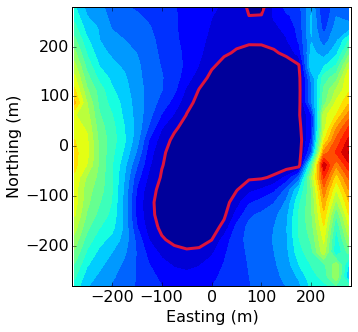

In [202]:
vizDCdata(dcdata, src1,rx_x, contour=[0.025])

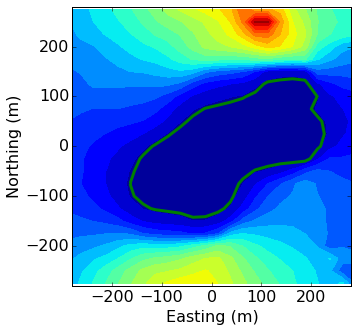

In [222]:
vizDCdata(dcdata, src3,rx_y, rxcomponent="Y", contour=[0.025], ls="-", color="green")

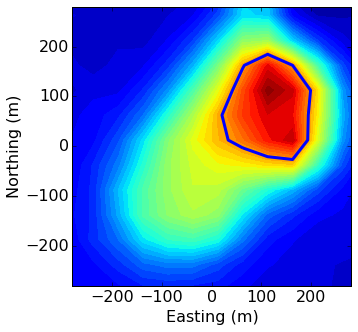

In [209]:
vizPFdata(magdata, contour=[100], color="blue")

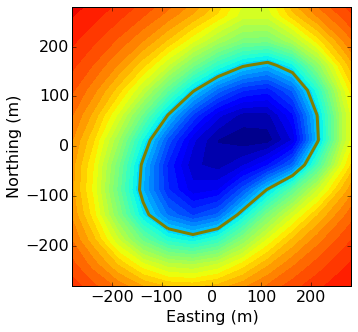

In [205]:
vizPFdata(gravdata, contour=[-1.0], color="olive", ls="-")

(-280.0, 280.0)

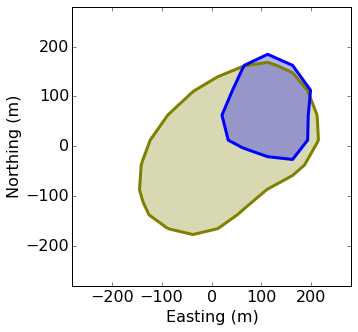

In [217]:
figsize(5,5)
temp = gravdata.reshape(Y_PF.shape)
plt.contourf(X_PF, Y_PF, temp, levels=[-10,-1.0], colors="olive", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(X_PF, Y_PF, temp, levels=[-10,-1.0], colors="olive", linewidths = (3,), linestyles="-")
temp = magdata.reshape(Y_PF.shape)
plt.contourf(X_PF, Y_PF, temp, levels=[100., 1000.], colors="blue", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(X_PF, Y_PF, temp, levels=[100.,1000.], colors="blue", linewidths = (3,), linestyles="-")

# temp = dcdata[src1,rx_x].reshape(Xx.shape,order="F")
# plt.contourf(Xx, Yx, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="-", alpha=0.3)
# plt.contour(Xx, Yx, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="-")
# temp = dcdata[src3,rx_y].reshape(Xy.shape,order="F")
# plt.contourf(Xy, Yy, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="--", alpha=0.3)
# plt.contour(Xy, Yy, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="--")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")            
plt.xlim(-280., 280.)
plt.ylim(-280., 280.)    


(-280.0, 280.0)

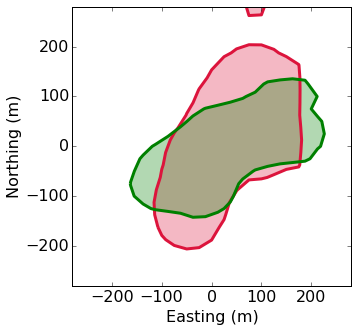

In [223]:
figsize(5,5)
# temp = gravdata.reshape(Y_PF.shape)
# plt.contourf(X_PF, Y_PF, temp, levels=[-10,-1.0], colors="olive", linewidths = (3,), linestyles="-", alpha=0.3)
# plt.contour(X_PF, Y_PF, temp, levels=[-10,-1.0], colors="olive", linewidths = (3,), linestyles="-")
# temp = magdata.reshape(Y_PF.shape)
# plt.contourf(X_PF, Y_PF, temp, levels=[100., 1000.], colors="blue", linewidths = (3,), linestyles="-", alpha=0.3)
# plt.contour(X_PF, Y_PF, temp, levels=[100.,1000.], colors="blue", linewidths = (3,), linestyles="-")

temp = dcdata[src1,rx_x].reshape(Xx.shape,order="F")
plt.contourf(Xx, Yx, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(Xx, Yx, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="-")
temp = dcdata[src3,rx_y].reshape(Xy.shape,order="F")
plt.contourf(Xy, Yy, temp, levels=[0., 0.025], colors="green", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(Xy, Yy, temp, levels=[0., 0.025], colors="green", linewidths = (3,), linestyles="-")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")            
plt.xlim(-280., 280.)
plt.ylim(-280., 280.)    


(-280.0, 280.0)

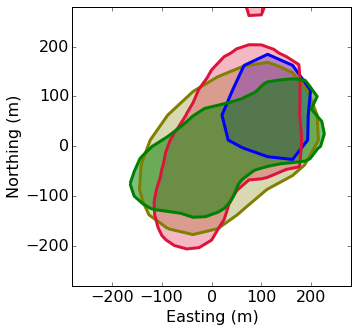

In [225]:
figsize(5,5)
temp = gravdata.reshape(Y_PF.shape)
plt.contourf(X_PF, Y_PF, temp, levels=[-10,-1.0], colors="olive", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(X_PF, Y_PF, temp, levels=[-10,-1.0], colors="olive", linewidths = (3,), linestyles="-")
temp = magdata.reshape(Y_PF.shape)
plt.contourf(X_PF, Y_PF, temp, levels=[100., 1000.], colors="blue", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(X_PF, Y_PF, temp, levels=[100.,1000.], colors="blue", linewidths = (3,), linestyles="-")

temp = dcdata[src1,rx_x].reshape(Xx.shape,order="F")
plt.contourf(Xx, Yx, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="-", alpha=0.3)
plt.contour(Xx, Yx, temp, levels=[0., 0.025], colors="crimson", linewidths = (3,), linestyles="-")
temp = dcdata[src3,rx_y].reshape(Xy.shape,order="F")
plt.contourf(Xy, Yy, temp, levels=[0., 0.025], colors="green", linewidths = (3,), linestyles="-", alpha=0.5)
plt.contour(Xy, Yy, temp, levels=[0., 0.025], colors="green", linewidths = (3,), linestyles="-")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")            
plt.xlim(-280., 280.)
plt.ylim(-280., 280.)    
